In [154]:
import pandas as pd
import geopandas

In [155]:
lsoas = geopandas.read_file("Lower_layer_Super_Output_Areas_2021_EW_BGC_V3_2542665517405622314.gpkg")
lsoas.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104...."
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572...."
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071...."
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842...."
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118...."


In [156]:
demand = lsoas[["LSOA21CD"]].copy()
demand.head()

,LSOA21CD
0,E01000001
1,E01000002
2,E01000003
3,E01000005
4,E01000006


In [157]:
# Source: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/lowersuperoutputareamidyearpopulationestimatesnationalstatistics
population = pd.read_excel("sapelsoabroadagetablefinal.xlsx",
                           sheet_name="Mid-2021 LSOA 2021",
                           skiprows=3)
population.head()

,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0 to 15,F16 to 29,F30 to 44,F45 to 64,F65 and over,M0 to 15,M16 to 29,M30 to 44,M45 to 64,M65 and over
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,1854,174,157,180,276,182,202,162,155,234,132
1,E06000001,Hartlepool,E01011950,Hartlepool 008A,1037,92,75,100,150,88,87,80,125,159,81
2,E06000001,Hartlepool,E01011951,Hartlepool 007A,1203,102,117,131,164,85,112,97,137,189,69
3,E06000001,Hartlepool,E01011952,Hartlepool 002A,1610,184,126,150,220,193,183,109,111,202,132
4,E06000001,Hartlepool,E01011953,Hartlepool 002B,1970,229,215,189,231,149,278,164,151,225,139


In [158]:
population["F"] = population.filter(regex='^F\d+').sum(axis=1) # Sum if column starts with F and a digit
population["Percentage Female"] = (population["F"] / population["Total"] )  * 100

population["Over 65"] = population.filter(regex='65 and over').sum(axis=1)
population["Percentage Over 65"] = (population["Over 65"] / population["Total"] ) * 100

population["Under 16"]  = population.filter(regex='0 to 15').sum(axis=1)
population["Percentage Under 16"] = (population["Under 16"] / population["Total"] ) * 100

population["Age 16-64"]  = population['Total'] - population["Under 16"] - population["Over 65"]
population["Percentage Age 16-64"] = (population["Age 16-64"] / population["Total"] ) * 100

population.head()


,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0 to 15,F16 to 29,F30 to 44,F45 to 64,F65 and over,...,M45 to 64,M65 and over,F,Percentage Female,Over 65,Percentage Over 65,Under 16,Percentage Under 16,Age 16-64,Percentage Age 16-64
0,E06000001,Hartlepool,E01011949,Hartlepool 009A,1854,174,157,180,276,182,...,234,132,969,52.265372,314,16.936354,376,20.280475,1164,62.783172
1,E06000001,Hartlepool,E01011950,Hartlepool 008A,1037,92,75,100,150,88,...,159,81,505,48.698168,169,16.297011,179,17.261331,689,66.441659
2,E06000001,Hartlepool,E01011951,Hartlepool 007A,1203,102,117,131,164,85,...,189,69,599,49.792186,154,12.801330,214,17.788861,835,69.409809
3,E06000001,Hartlepool,E01011952,Hartlepool 002A,1610,184,126,150,220,193,...,202,132,873,54.223602,325,20.186335,367,22.795031,918,57.018634
4,E06000001,Hartlepool,E01011953,Hartlepool 002B,1970,229,215,189,231,149,...,225,139,1013,51.421320,288,14.619289,507,25.736041,1175,59.644670


In [159]:
population.sort_values("Over 65", ascending=True)

,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0 to 15,F16 to 29,F30 to 44,F45 to 64,F65 and over,...,M45 to 64,M65 and over,F,Percentage Female,Over 65,Percentage Over 65,Under 16,Percentage Under 16,Age 16-64,Percentage Age 16-64
2849,E06000023,Bristol,E01033348,Bristol 059C,1184,79,214,165,110,0,...,105,0,568,47.972973,0,0.000000,171,14.442568,1013,85.557432
3822,E06000032,Luton,E01033804,Luton 023B,1175,114,160,165,85,0,...,157,0,524,44.595745,0,0.000000,218,18.553191,957,81.446809
33296,E09000030,Tower Hamlets,E01035703,Tower Hamlets 036B,1098,20,372,145,10,0,...,50,0,547,49.817851,0,0.000000,41,3.734062,1057,96.265938
33250,E09000030,Tower Hamlets,E01035657,Tower Hamlets 001E,1027,51,156,250,35,0,...,55,0,492,47.906524,0,0.000000,88,8.568647,939,91.431353
33297,E09000030,Tower Hamlets,E01035704,Tower Hamlets 036C,1746,145,462,225,75,0,...,95,0,907,51.947308,0,0.000000,305,17.468499,1441,82.531501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,E07000063,Lewes,E01021026,Lewes 002B,2563,162,106,126,326,736,...,313,411,1456,56.808428,1147,44.752243,341,13.304721,1075,41.943036
10106,E07000040,East Devon,E01019957,East Devon 012B,1728,45,35,45,188,654,...,146,498,967,55.960648,1152,66.666667,92,5.324074,484,28.009259
7859,E06000059,Dorset,E01020406,Dorset 015D,2514,107,91,115,362,599,...,340,564,1274,50.676213,1163,46.260939,229,9.108990,1122,44.630072
11113,E07000069,Castle Point,E01021495,Castle Point 009C,1997,72,60,75,231,666,...,196,500,1104,55.282924,1166,58.387581,124,6.209314,707,35.403105


In [160]:
population.sort_values("Over 65", ascending=False)

,LAD 2021 Code,LAD 2021 Name,LSOA 2021 Code,LSOA 2021 Name,Total,F0 to 15,F16 to 29,F30 to 44,F45 to 64,F65 and over,...,M45 to 64,M65 and over,F,Percentage Female,Over 65,Percentage Over 65,Under 16,Percentage Under 16,Age 16-64,Percentage Age 16-64
34216,W06000008,Ceredigion,W01002002,Ceredigion 007E,4314,304,218,307,672,706,...,611,681,2207,51.159017,1387,32.151136,624,14.464534,2303,53.384330
11113,E07000069,Castle Point,E01021495,Castle Point 009C,1997,72,60,75,231,666,...,196,500,1104,55.282924,1166,58.387581,124,6.209314,707,35.403105
7859,E06000059,Dorset,E01020406,Dorset 015D,2514,107,91,115,362,599,...,340,564,1274,50.676213,1163,46.260939,229,9.108990,1122,44.630072
10106,E07000040,East Devon,E01019957,East Devon 012B,1728,45,35,45,188,654,...,146,498,967,55.960648,1152,66.666667,92,5.324074,484,28.009259
10631,E07000063,Lewes,E01021026,Lewes 002B,2563,162,106,126,326,736,...,313,411,1456,56.808428,1147,44.752243,341,13.304721,1075,41.943036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,E06000054,Wiltshire,E01031988,Wiltshire 045B,2838,426,264,446,65,0,...,86,0,1201,42.318534,0,0.000000,871,30.690627,1967,69.309373
7032,E06000054,Wiltshire,E01032107,Wiltshire 042C,1326,219,127,246,50,0,...,85,0,642,48.416290,0,0.000000,430,32.428356,896,67.571644
30512,E09000011,Greenwich,E01034175,Greenwich 034G,1257,91,159,332,55,0,...,55,0,637,50.676213,0,0.000000,166,13.206046,1091,86.793954
30518,E09000011,Greenwich,E01034181,Greenwich 035H,1800,109,427,319,65,0,...,60,0,920,51.111111,0,0.000000,225,12.500000,1575,87.500000


In [161]:
demand = demand.merge(population[["LSOA 2021 Code",
                         "Total", "F", "Under 16", "Over 65", "Age 16-64",
                         "Percentage Female", "Percentage Under 16", "Percentage Over 65",
                         "Percentage Age 16-64"]],
             left_on="LSOA21CD",
             right_on="LSOA 2021 Code",
             how="left").drop(columns="LSOA 2021 Code").rename(columns={"Total": "Population"})
demand.head()

,LSOA21CD,Population,F,Under 16,Over 65,Age 16-64,Percentage Female,Percentage Under 16,Percentage Over 65,Percentage Age 16-64
0,E01000001,1573,723,134,409,1030,45.963128,8.518754,26.001271,65.479975
1,E01000002,1407,614,76,293,1038,43.638948,5.401564,20.824449,73.773987
2,E01000003,1610,783,111,318,1181,48.633540,6.894410,19.751553,73.354037
3,E01000005,1104,542,152,94,858,49.094203,13.768116,8.514493,77.717391
4,E01000006,1829,910,404,165,1260,49.753964,22.088573,9.021323,68.890104


In [162]:
lsoas_demand_demographics = lsoas.merge(demand, on="LSOA21CD")

Remove Wales to shrink filesize slightly.

In [163]:
lsoas_demand_demographics = lsoas_demand_demographics[~lsoas_demand_demographics["LSOA21CD"].str.contains("^W")]

<Axes: >

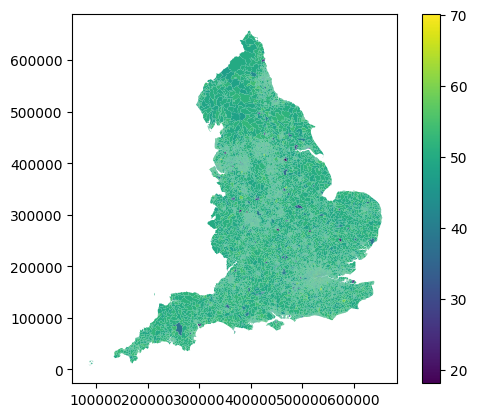

In [164]:
lsoas_demand_demographics.plot("Percentage Female", legend=True)

<Axes: >

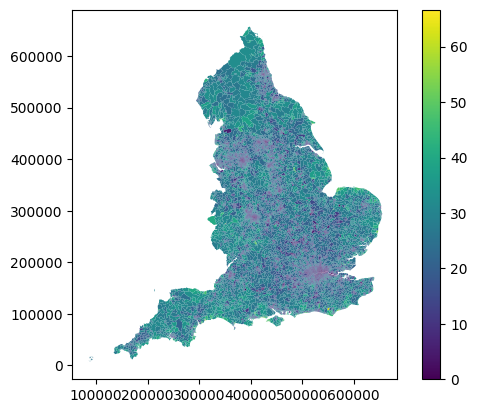

In [165]:
lsoas_demand_demographics.plot("Percentage Over 65", legend=True)

<Axes: >

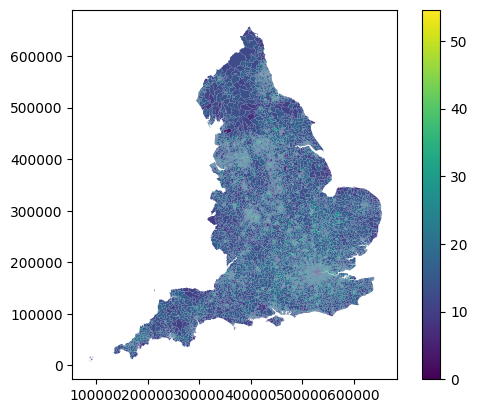

In [166]:
lsoas_demand_demographics.plot("Percentage Under 16", legend=True)

<Axes: >

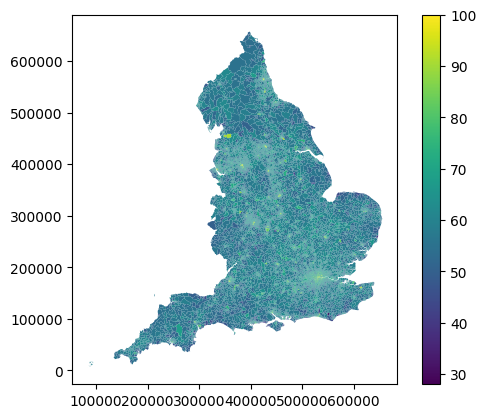

In [167]:
lsoas_demand_demographics.plot("Percentage Age 16-64", legend=True)

<Axes: >

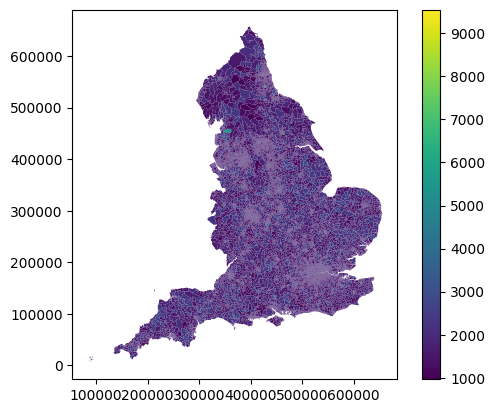

In [168]:
lsoas_demand_demographics.plot("Population", legend=True)

In [169]:
import random

In [170]:
lsoas_demand_demographics.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Population,F,Under 16,Over 65,Age 16-64,Percentage Female,Percentage Under 16,Percentage Over 65,Percentage Age 16-64
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104....",1573,723,134,409,1030,45.963128,8.518754,26.001271,65.479975
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572....",1407,614,76,293,1038,43.638948,5.401564,20.824449,73.773987
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071....",1610,783,111,318,1181,48.633540,6.894410,19.751553,73.354037
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842....",1104,542,152,94,858,49.094203,13.768116,8.514493,77.717391
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118....",1829,910,404,165,1260,49.753964,22.088573,9.021323,68.890104


In [171]:
lsoas_demand_demographics["Projected Average Daily Demand"] = (
    lsoas_demand_demographics["Population"] /(random.randint(365, 395))
    + lsoas_demand_demographics["Over 65"]/(random.randint(245, 285))
    + lsoas_demand_demographics["Under 16"]/(random.randint(320, 340))
    ).astype(int)

lsoas_demand_demographics.head()

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Population,F,Under 16,Over 65,Age 16-64,Percentage Female,Percentage Under 16,Percentage Over 65,Percentage Age 16-64,Projected Average Daily Demand
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104....",1573,723,134,409,1030,45.963128,8.518754,26.001271,65.479975,5
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572....",1407,614,76,293,1038,43.638948,5.401564,20.824449,73.773987,4
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071....",1610,783,111,318,1181,48.633540,6.894410,19.751553,73.354037,5
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842....",1104,542,152,94,858,49.094203,13.768116,8.514493,77.717391,3
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118....",1829,910,404,165,1260,49.753964,22.088573,9.021323,68.890104,6


In [172]:
lsoas_demand_demographics

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry,Population,F,Under 16,Over 65,Age 16-64,Percentage Female,Percentage Under 16,Percentage Over 65,Percentage Age 16-64,Projected Average Daily Demand
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},"MULTIPOLYGON (((532105.312 182010.574, 532104....",1573,723,134,409,1030,45.963128,8.518754,26.001271,65.479975,5
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},"MULTIPOLYGON (((532634.497 181926.016, 532572....",1407,614,76,293,1038,43.638948,5.401564,20.824449,73.773987,4
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},"MULTIPOLYGON (((532135.138 182198.131, 532071....",1610,783,111,318,1181,48.633540,6.894410,19.751553,73.354037,5
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},"MULTIPOLYGON (((533808.018 180767.774, 533842....",1104,542,152,94,858,49.094203,13.768116,8.514493,77.717391,3
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},"MULTIPOLYGON (((545122.049 184314.931, 545118....",1829,910,404,165,1260,49.753964,22.088573,9.021323,68.890104,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33750,E01035758,Vale of White Horse 014H,439310,187522,-1.434010,51.585190,{438818B7-9129-4D2F-AC3E-68CFB101E26D},"MULTIPOLYGON (((440023.734 188362.55, 440013.1...",1149,631,149,325,675,54.917319,12.967798,28.285466,58.746736,4
33751,E01035759,Vale of White Horse 015G,448893,192090,-1.295070,51.625511,{19A33729-D960-4CF5-AEE5-6CC3A0E5AB44},"MULTIPOLYGON (((448931.938 193306.859, 448142....",1497,760,302,238,957,50.768203,20.173681,15.898464,63.927856,5
33752,E01035760,Vale of White Horse 015H,450112,190802,-1.277640,51.613819,{53BBC9C7-0415-4A01-B4E3-47789B46731D},"MULTIPOLYGON (((450708.409 190217.086, 450721....",1602,814,474,88,1040,50.811486,29.588015,5.493134,64.918851,5
33753,E01035761,Vale of White Horse 015I,448578,188787,-1.300080,51.595840,{7CF76356-0569-4AE7-A8D7-482D2573C91F},"MULTIPOLYGON (((448999.655 189423.097, 449081....",1590,816,416,156,1018,51.320755,26.163522,9.811321,64.025157,5


In [173]:
# limit to reduce filesize
lsoas_demand_demographics = lsoas_demand_demographics[lsoas_demand_demographics["LAT"] <53]

In [174]:
lsoas_demand_demographics.to_file("../../../exercises/exercise_3/lsoa_demand_demographics.geojson",
                                  driver="Geojson")

In [175]:
# Check read
geopandas.read_file("../../../exercises/exercise_3/lsoa_demand_demographics.geojson")

,LSOA21CD,LSOA21NM,BNG_E,BNG_N,LONG,LAT,GlobalID,Population,F,Under 16,Over 65,Age 16-64,Percentage Female,Percentage Under 16,Percentage Over 65,Percentage Age 16-64,Projected Average Daily Demand,geometry
0,E01000001,City of London 001A,532123,181632,-0.097140,51.518162,{1A259A13-A525-4858-9CB0-E4952BA01AF6},1573,723,134,409,1030,45.963128,8.518754,26.001271,65.479975,5,"MULTIPOLYGON (((532105.312 182010.574, 532104...."
1,E01000002,City of London 001B,532480,181715,-0.091970,51.518822,{1233E433-0B0D-4807-8117-17A83C23960D},1407,614,76,293,1038,43.638948,5.401564,20.824449,73.773987,4,"MULTIPOLYGON (((532634.497 181926.016, 532572...."
2,E01000003,City of London 001C,532239,182033,-0.095320,51.521740,{5163B7CB-4FFE-4F41-95B9-AA6CFC0508A3},1610,783,111,318,1181,48.633540,6.894410,19.751553,73.354037,5,"MULTIPOLYGON (((532135.138 182198.131, 532071...."
3,E01000005,City of London 001E,533581,181283,-0.076270,51.514679,{2AF8015E-386E-456D-A45A-D0A223C340DF},1104,542,152,94,858,49.094203,13.768116,8.514493,77.717391,3,"MULTIPOLYGON (((533808.018 180767.774, 533842...."
4,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.538750,{B492B45E-175E-4E77-B0B5-5B2FD6993EF4},1829,910,404,165,1260,49.753964,22.088573,9.021323,68.890104,6,"MULTIPOLYGON (((545122.049 184314.931, 545118...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22981,E01035758,Vale of White Horse 014H,439310,187522,-1.434010,51.585190,{438818B7-9129-4D2F-AC3E-68CFB101E26D},1149,631,149,325,675,54.917319,12.967798,28.285466,58.746736,4,"MULTIPOLYGON (((440023.734 188362.55, 440013.1..."
22982,E01035759,Vale of White Horse 015G,448893,192090,-1.295070,51.625511,{19A33729-D960-4CF5-AEE5-6CC3A0E5AB44},1497,760,302,238,957,50.768203,20.173681,15.898464,63.927856,5,"MULTIPOLYGON (((448931.938 193306.859, 448142...."
22983,E01035760,Vale of White Horse 015H,450112,190802,-1.277640,51.613819,{53BBC9C7-0415-4A01-B4E3-47789B46731D},1602,814,474,88,1040,50.811486,29.588015,5.493134,64.918851,5,"MULTIPOLYGON (((450708.409 190217.086, 450721...."
22984,E01035761,Vale of White Horse 015I,448578,188787,-1.300080,51.595840,{7CF76356-0569-4AE7-A8D7-482D2573C91F},1590,816,416,156,1018,51.320755,26.163522,9.811321,64.025157,5,"MULTIPOLYGON (((448999.655 189423.097, 449081...."
